## Voorbeeld 2
Voor het tweede voorbeel gaan we met de volgende dataset werken:  
https://www.researchgate.net/figure/Data-used-for-tumor-volume-changes-over-time_tbl2_379619943



In [19]:
import pandas as pd
from ode_solver import *

dagen = [0,13,20,32,42,55,65,75,85,88,95,98,107,115,120]
volumes = [25,25,55,57,57,80,105,125,175,200,255,275,300,350,400]
echte_data = pd.DataFrame({"$t$": dagen, "$V$": volumes}).T
echte_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
$t$,0,13,20,32,42,55,65,75,85,88,95,98,107,115,120
$V$,25,25,55,57,57,80,105,125,175,200,255,275,300,350,400


Als eerst gaan we alle modelen weer vergelijken zoals bij voorbeeld 1

In [33]:
# Voor elk model de AIC-waarde berekenen:
aantal_datapunten = len(volumes)
#Vs_scaled = [v / 100 for v in volumes]
Vs_scaled = [1,2,3,4,5,6,7,9,9,10,11,12,13,14,15]

solver = ode_solver(Vs_scaled[0], 120, 1)
params0 = {"c" : 0.0, "min_volume" : 0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, min_volume, max_volume: solver.allee(c, min_volume, max_volume),
    params0 = params0
)
allee_aic = solver.aic(mse, aantal_datapunten, len(params))
alle_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, max_volume: solver.exponentieel_afvlakkend(c, max_volume),
    params0 = params0
)
exponentieel_afvlakkend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_afvlakkend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c: solver.exponentieel_toenemend(c),
    params0 = params0
)
exponentieel_toenemend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_toenemend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.1, "volume_max" : 100}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, volume_max: solver.gompertz(c, volume_max),
    params0 = params0
)
gompertz_aic = solver.aic(mse, aantal_datapunten, len(params))
gompertz_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c: solver.lineair(c),
    params0 = params0
)
lineair_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.lineair_gelimiteerd(c, d),
    params0 = params0
)
lineair_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, max_volume: solver.logistisch(c, max_volume),
    params0 = params0
)
logistisch_aic = solver.aic(mse, aantal_datapunten, len(params))
logistisch_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.mendelsohn(c, d),
    params0 = params0
)
mendelsohn_aic = solver.aic(mse, aantal_datapunten, len(params))
mendelsohn_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.25, "d" : 1.0, "max_volume" : 4500.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d, max_volume: solver.montroll(c, d, max_volume),
    params0 = params0
)
montroll_aic = solver.aic(mse, aantal_datapunten, len(params))
montroll_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.oppervlakte_gelimiteerd(c, d),
    params0 = params0
)
oppervlakte_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
oppervlakte_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  volumes,
    model = lambda c, d: solver.von_bertalanffy(c, d),
    params0 = params0
)
von_bertalanffy_aic = solver.aic(mse, aantal_datapunten, len(params))
von_bertalanffy_bic = solver.bic(mse, aantal_datapunten, len(params))


print("AIC-waarde per model:")
print(f"Allee: {round(allee_aic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_aic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_aic, 3)}")
print(f"Gompertz: {round(gompertz_aic, 3)}")
print(f"Lineair: {round(lineair_aic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_aic, 3)}")
print(f"Logistisch: {round(logistisch_aic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_aic, 3)}")
print(f"Montroll: {round(montroll_aic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_aic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_aic, 3)}\n")


print("BIC-waarde per model:")
print(f"Allee: {round(alle_bic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_bic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_bic, 3)}")
print(f"Gompertz: {round(gompertz_bic, 3)}")
print(f"Lineair: {round(lineair_bic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_bic, 3)}")
print(f"Logistisch: {round(logistisch_bic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_bic, 3)}")
print(f"Montroll: {round(montroll_bic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_bic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_bic, 3)}")

AIC-waarde per model:
Allee: 129.08
Exponentieel afvlakkend: 72.787
Exponentieel toenemend: 108.108
Gompertz: 66.549
Lineair: 120.34
Lineair gelimiteerd: 112.233
Logistisch: 127.106
Mendelsohn: 51.6
Montroll: 224.835
Oppervlakte gelimiteerd: 55.205
Von Bertalanffy: 56.91

BIC-waarde per model:
Allee: 131.205
Exponentieel afvlakkend: 74.203
Exponentieel toenemend: 108.816
Gompertz: 67.965
Lineair: 121.048
Lineair gelimiteerd: 113.649
Logistisch: 128.522
Mendelsohn: 53.016
Montroll: 226.959
Oppervlakte gelimiteerd: 56.621
Von Bertalanffy: 58.326


Vanuit de BIC en AIC waardes kunnen we aflezen dat de montroll methode het beste model is voor deze data

In [35]:
model = ode_solver(25, 14, 1)
params0 = {"c" : 0.0, "d" : 0, "max_volume":1000}
params, mse = model.fit(
    echte_volumes=  volumes,
    model = lambda c, d, max_volume: model.montroll(c, d, max_volume),
    params0 = params0
)

v_dagen, v_volumes = model.montroll(**params)

voorspelde_data = pd.DataFrame({"$t$": v_dagen, "$V$": v_volumes}).T
voorspelde_data


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
$t$,0.0,1.000000,2.000000,3.000000,4.000000,5.00000,6.000000,7.000000,8.000000,9.000000,10.00000,11.000000,12.000000,13.000000,14.000000
$V$,25.0,32.985118,43.060562,55.583045,70.900632,89.32687,111.111784,136.412762,165.269127,197.584243,233.11834,271.493867,312.213268,354.687256,398.270088


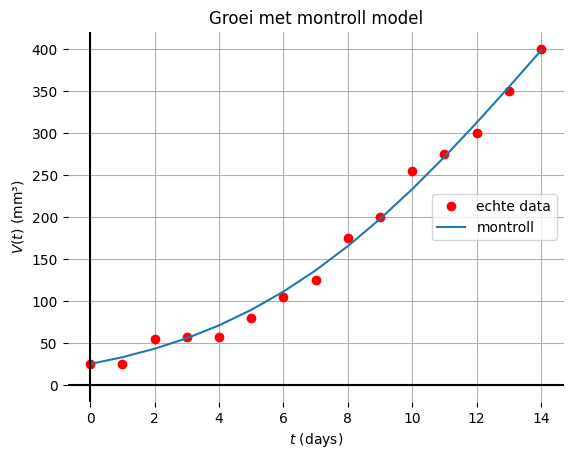

In [41]:
dagen_in_data_punten = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(dagen_in_data_punten, volumes, "or", label = "echte data")
plt.plot(v_dagen, v_volumes, label = "montroll")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met montroll model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

zoals te zien in de grafiek loopt de lijn relatief goed door de data heen.  

Als je met dit model verder wilt rekenen kun je het voorbeeld volgen of handmatig een dictionairy met de benodigde variablen megeven aan de ode methode of een dictionary met je eigen waardes meegeven.

In [46]:
# start waardes
start_volume = 25
number_of_data_points = 30
delta_t = 1

model = ode_solver(start_volume, number_of_data_points, delta_t)
# parameters voor het model
params0 = {"c" : 0.0, "d" : 0, "max_volume":1000}

params, mse = model.fit(
    echte_volumes=  volumes,
    model = lambda c, d, max_volume: model.montroll(c, d, max_volume),
    params0 = params0
)
# params als argument in het method model
v_dagen, v_volumes = model.montroll(**params)

voorspelde_data = pd.DataFrame({"$t$": v_dagen, "$V$": v_volumes}).T
voorspelde_data


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
$t$,0.0,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,21.000000,22.000000,23.000000,24.000000,25.00000,26.000000,27.000000,28.000000,29.000000,30.00000
$V$,25.0,33.008406,43.115794,55.679434,71.047182,89.531417,111.379936,136.746912,165.667689,198.041271,...,684.321829,717.291924,747.707032,775.564021,800.91448,823.852136,844.501294,863.006696,879.525012,894.21796


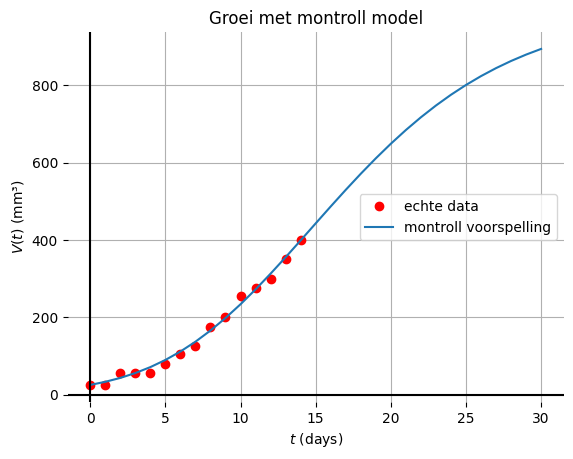

In [48]:
dagen_in_data_punten = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
plt.plot(dagen_in_data_punten, volumes, "or", label = "echte data")
plt.plot(v_dagen, v_volumes, label = "montroll voorspelling")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met montroll model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()